# Object Classification

### Problem Statement

In this tutorial, we shall train a model for classifying the digits using our own network, and then we shall how good/bad it is compared to the the one trained using transfer learning.

We use the famous Digits Recoginition Challenge Dataset - MNIST readily avaliable from one of the frameworks. 

We shall follow the following steps: 
1. Load the Data (already split into train and test)
2. Define a Convolutional Neural Network to train a Classification Problem for classifying fashion clothing
3. Train a model using the training set
4. Evluate the model on test set
5. Repeat a similar approach for Tranfer Learning using a pre-trained model

In [108]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

In [110]:
# Load Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)

# Mention the Class Name List
class_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert a one-hot vector for the test-labels
y_train = keras.utils.to_categorical(y_train, num_classes=len(class_list))


# Split the test set to Validation & Test set
num_test_samples = x_test.shape[0]
x_val, y_val = x_test[0:num_test_samples//2,:,:], y_test[0:num_test_samples//2]
x_test, y_test = x_test[num_test_samples//2:,:,:], y_test[num_test_samples//2:]

x_val = x_val.reshape(5000,28,28,1)
y_val = keras.utils.to_categorical(y_val, num_classes=len(class_list))

x_test = x_test.reshape(5000,28,28,1)


Here, We can see that we have 60000 images for training with 10 different class labels:<br>
0   T-shirt/top <br>
1   Trouser<br>
2 	Pullover<br>
3 	Dress<br>
4 	Coat<br>
5 	Sandal<br>
6 	Shirt<br>
7 	Sneaker<br>
8 	Bag<br>
9 	Ankle boot<br>

In [111]:
# Train Data 
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [112]:
# Validation Data
x_val.shape, y_val.shape

((5000, 28, 28, 1), (5000, 10))

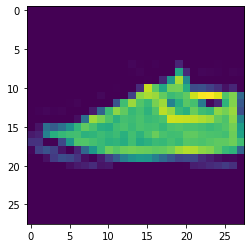

In [113]:
num = random.randint(0,60000)
class_fig = class_list[np.argmax(y_train[num])]

plt.imshow(x_train[num].reshape(28,28))
print("Class Name :{}".format(class_fig))

In [114]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Conv2D, Activation, Dense, Flatten, MaxPooling2D

# Writing the model
model = Sequential()

inputs = Input(shape=(28, 28))

model.add(Conv2D(filters=32,kernel_size=3, strides=2,padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3), strides=(2,2),padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=128,kernel_size=(3,3), strides=(2,2),padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(10,activation='softmax',use_bias=True))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [115]:
# Train the model
model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 314us/step - loss: 1.4006 - accuracy: 0.7575 - val_loss: 0.4771 - val_accuracy: 0.8274
Epoch 2/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.3893 - accuracy: 0.8603 - val_loss: 0.4155 - val_accuracy: 0.8514
Epoch 3/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.3411 - accuracy: 0.8769 - val_loss: 0.3944 - val_accuracy: 0.8638
Epoch 4/5
60000/60000 [==============================] - 18s 300us/step - loss: 0.3104 - accuracy: 0.8862 - val_loss: 0.3808 - val_accuracy: 0.8702
Epoch 5/5
60000/60000 [==============================] - 19s 324us/step - loss: 0.2878 - accuracy: 0.8947 - val_loss: 0.3958 - val_accuracy: 0.8632


In [119]:
# Predict on Test Set
y_pred = model.predict_classes(x_test)
acc = np.sum(y_test == y_pred) / y_test.shape[0]
#Print Accuracy
print("Test Accuracy :{}".format(acc*100))

87.24

In [120]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
activation_42 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
activation_43 (Activation)   (None, 4, 4, 64)          0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 1, 1, 128)       